# **Fantasy Sports Clustering Analysis**

--------------------------------
## **Context** 
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have asked to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# Importing PCA
from sklearn.decomposition import PCA

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data
data = pd.read_csv("fpl_data.csv")

In [3]:
# Checking the shape of the data
data.shape

(476, 13)

Shows the 476 players with 13 features

In [4]:
# View randome sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [5]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


* `Player_Name` `Club` `Position`, are the only object type columns the rest are numerical
* Of the 476 players and 13 columns there are no missing values 

In [6]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [8]:
# Check for missing values in the data
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

There are no missing values

## **Exploratory Data Analysis**

**Check the statistical summary of the data**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


**Observations and Insights:**
* `Goals_Scored` Number of goals scored by the player in the previous season.
    *  Over 25% of players have scored no goals with a median of 0.5 goals
    * **Difference between 75th percentile and max could indicate a possible outlier**, but more likely representing strikers who get most goals. 
* `Assists` Number of passes made by the player leading to goals in the previous season.
    * Over 50% of players have no assists. 
* `Total_Points` Total number of fantasy points scored by the player in the previous season.
    * Median number of points is 48 with a min of 0 and max of 244
    * **Difference between 75th percentile and max could indicate a possible outlier**
* `Minutes` Number of minutes played by the player in the previous season.
    * Looks to be normaly distributed with an average of 1336min (22.27h), a min of 0 and max of 3420.
* `Goals_Conceded` Number of goals conceded by the player in the previous season.
    * Looks to be normaly distributed with an average of 19, a min of 0 and a max of 68
* `Creativity` A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
    * **Difference between 75th percentile and max could indicate a possible outlier**
* `Influence` A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
    * Looks to be reletively normaly distributed with a slight right skew.
* `Threat` A score, computed using a range of stats, that gauges players who are most likely to score goals.
    * Very heavliy right skewed which makes sense given strikers score most goals. 
* `Bonus` Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
    * * Very heavliy right skewed perhaps indicating consistently high performance players. 
* `Clean_Sheets` Number of matches without conceding a goal in the previous season.
    * More than 25% of players have 0 matches without conceding a goal, these are likely subs who do not get game time. 
    
With the consistency of features at 0, it is likely that **some players are getting no game time and therefore producing no fantasy points. This can be an expected group that emerges in our clustering algorithm.**

Most stats tend to have a slight right skew, **this perhaps indicates that they are not infact outliers but a handfull of high performance players.**

### **Univariate Analysis**

In [10]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

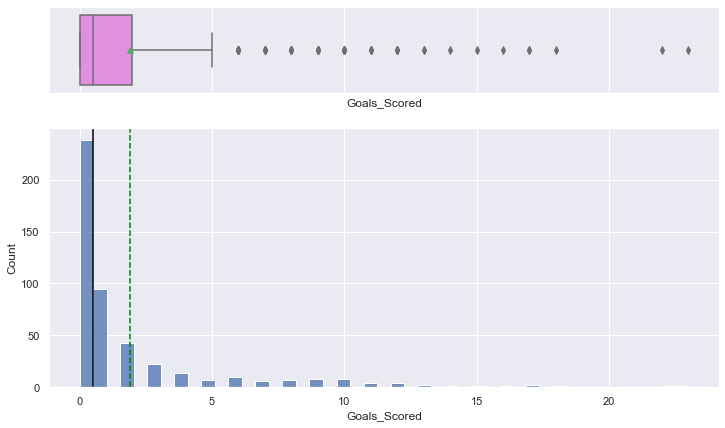

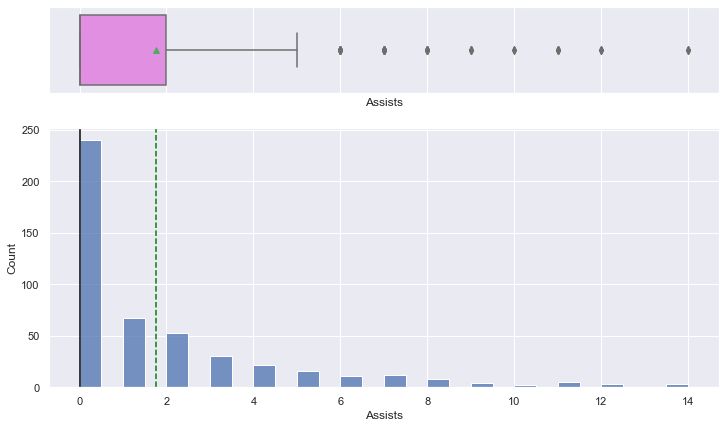

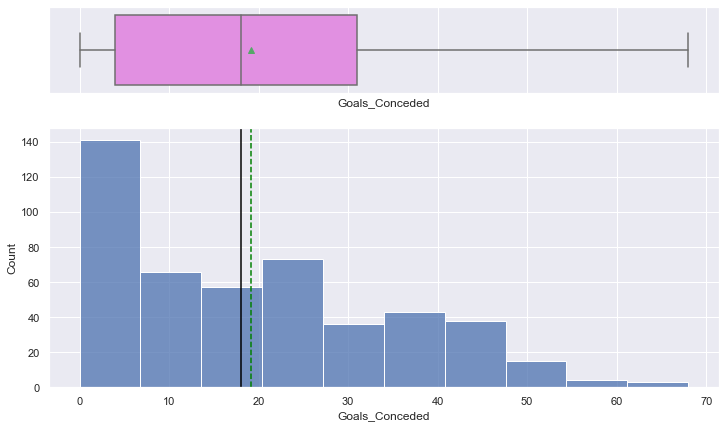

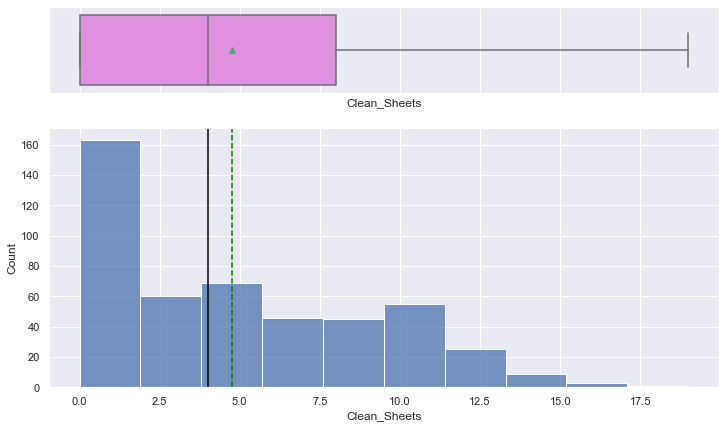

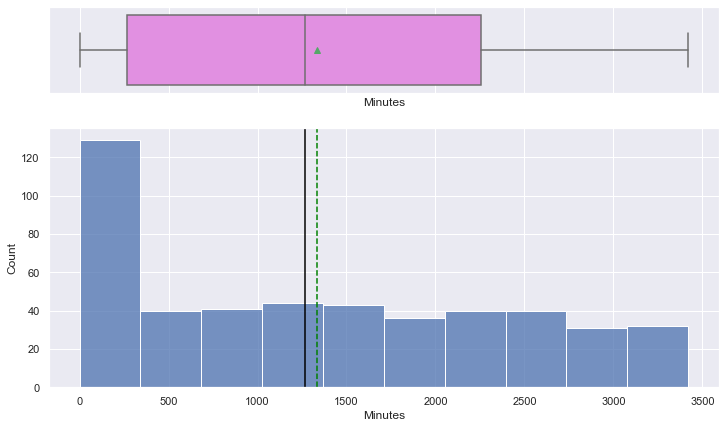

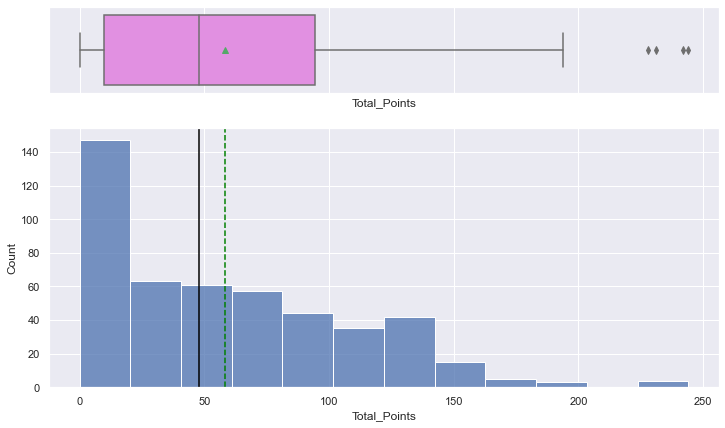

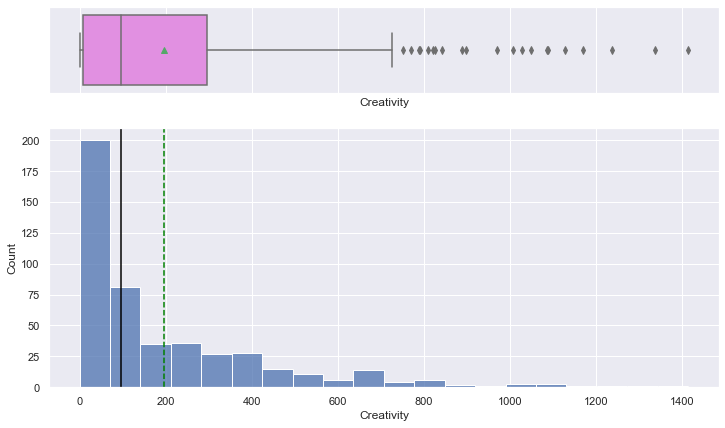

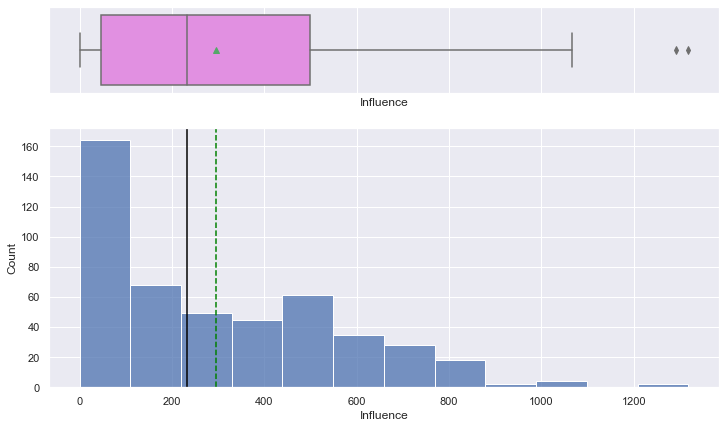

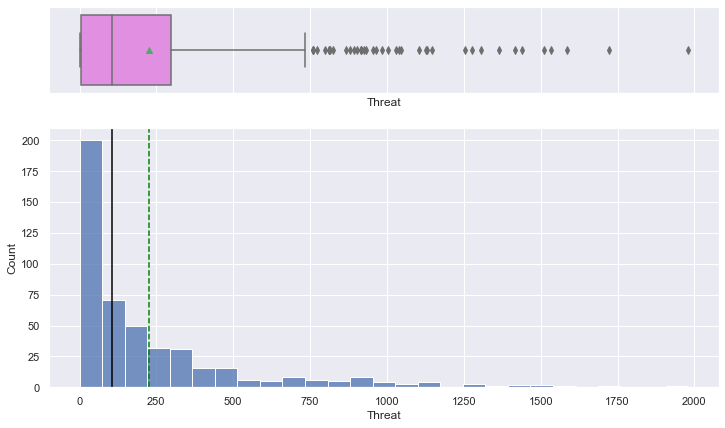

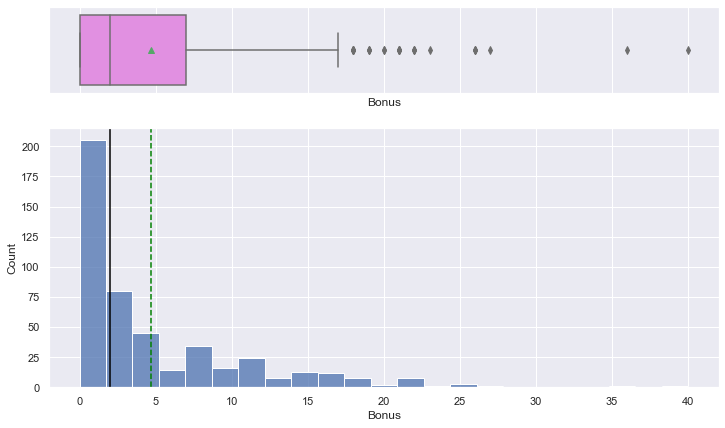

In [11]:
histogram_boxplot(df, 'Goals_Scored')
histogram_boxplot(df, 'Assists')  
histogram_boxplot(df, 'Goals_Conceded')
histogram_boxplot(df, 'Clean_Sheets')
histogram_boxplot(df, 'Minutes')
histogram_boxplot(df, 'Total_Points')
histogram_boxplot(df, 'Creativity')
histogram_boxplot(df, 'Influence')
histogram_boxplot(df, 'Threat')
histogram_boxplot(df, 'Bonus')

**Observations and Insights:**
The **right skewed nature** consistent through all plots indicate this is **not likely due to outliers** but rather an natural imbalance in the players. This imbalance likely stems from one of two factors:
* Players who are higher performers.
* Certain positions that tend to rank higher on the measurable features. 

In [12]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

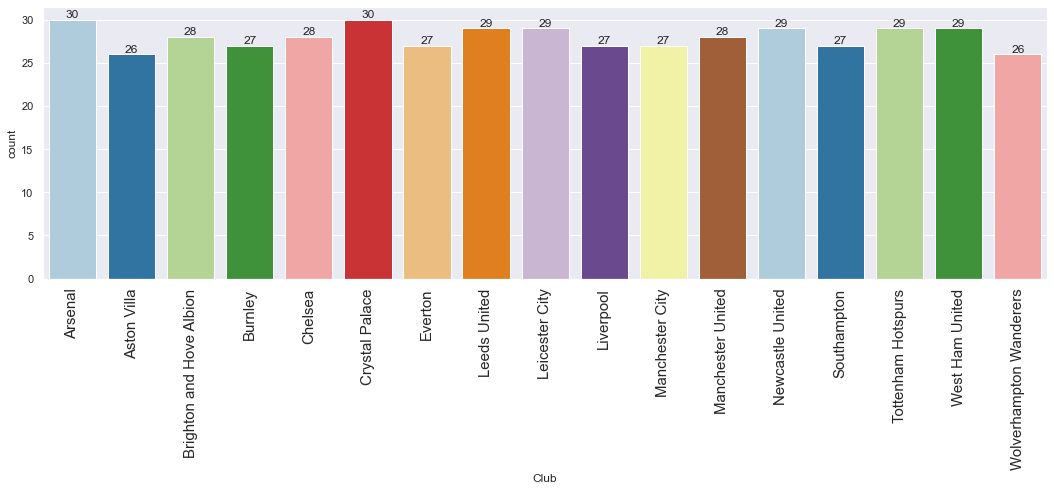

In [13]:
labeled_barplot(df, 'Club')

Reletively **uniform distribution** of players from each club, should help to minimize potential errors from imbalanced data. 

**`Position`**

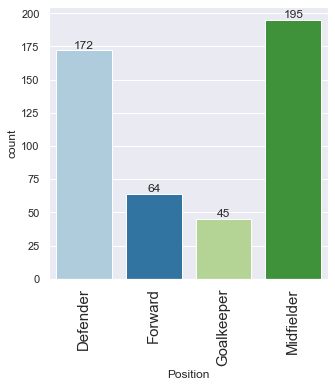

In [14]:
labeled_barplot(df, 'Position')

Of the 11 players on the field depending on the formation there is 1 goalie, 3-5 defenders, 4-5 midfielders, 1-3 forwards. 
* The split shown above matches those ratios with positions ranked as: 
    * Number of Midfielders > Defenders > Forwards > Goalkeepers. 
* Given the number of Clubs and Goal Keepers, each club has on average 2-3 goal keepers.

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

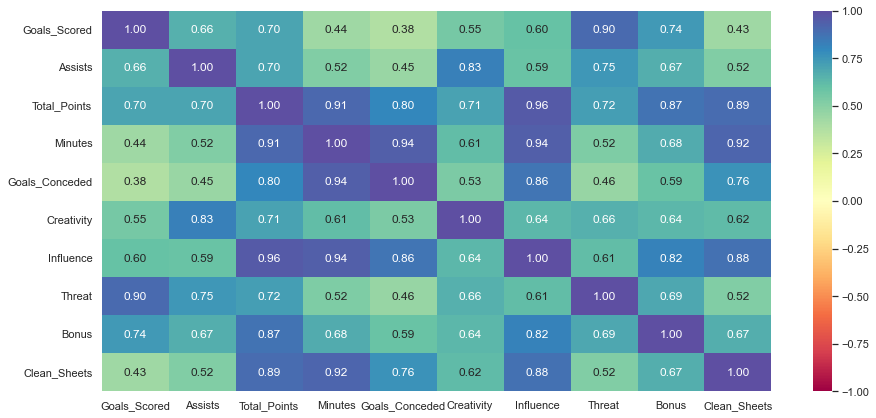

In [15]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations and Insights:**
There is a high correlation (>= 0.7 or <= -0.7) between:
* Correlation between Assists, Goals_Scored, and Total_Points, which makes sense given the first 2 contribute to the 3rd and those likely to score are also likely to get assists.
* Big correlation (.91) between minutes played and total_points, which makes sense as this gives players more chances.  
* Correlation between Goals_Conceded, Total_ Points, Minites, which echos our above observation that those withough goals conceded are likely not getting game time. 
* Correlation between Creativity and Assits, given creativity is a measure of, " A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.", that is likely mostly measured by assits. 

Could continue, but the **most relevant observation is that many of these features are highly correlated**.

**Check which players from which team have scored the most fantasy points on average.**

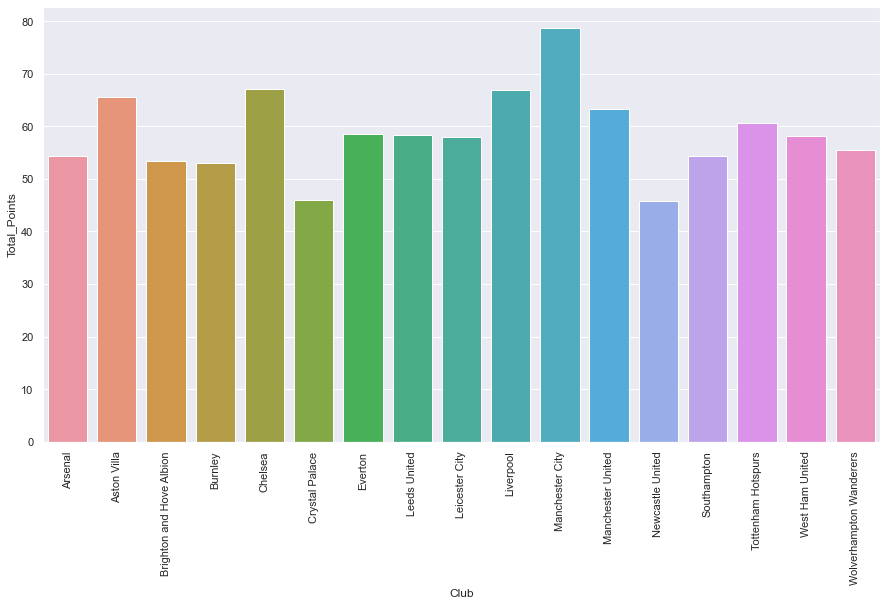

In [16]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Club' , y = 'Total_Points' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

Manchester City is the leader in points while Crystal Palace, and Newcastle United have the lowest number of points. 

**We hypothesied that players in different positions have score more goals. Check which positions tend to score more fantasy points on average.**

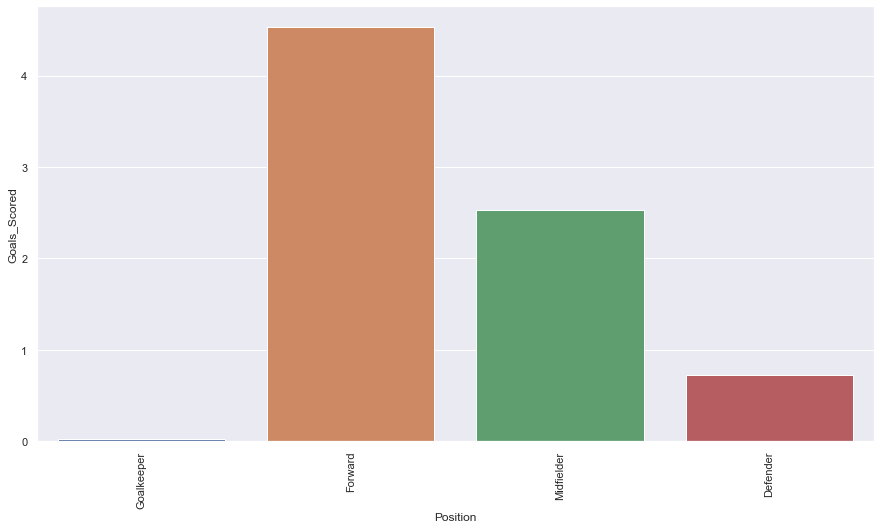

In [17]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Goals_Scored' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

As expected Forwards score the most goals followed by Midfielders at a little more than half as many and Defenders with half as many as that. 

**Check if the same is true for the number of points.**

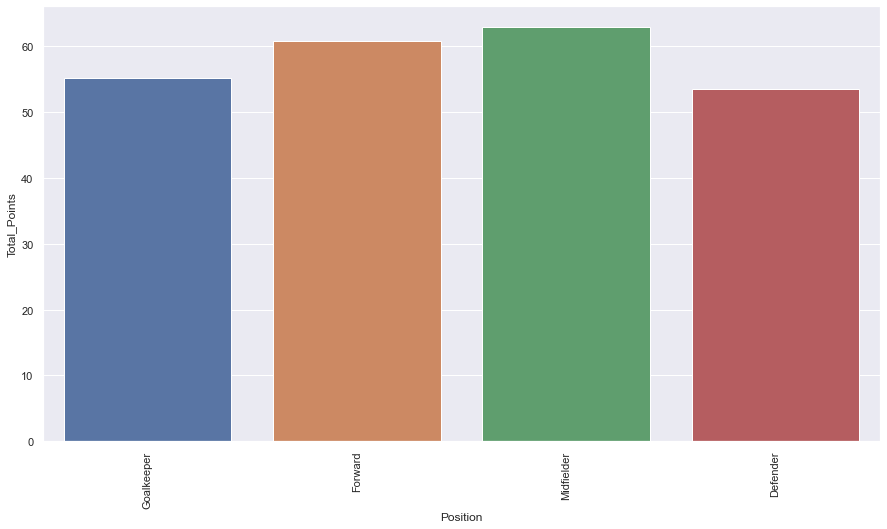

In [18]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = 'Position' , y = 'Total_Points' , ci = False) 

plt.xticks(rotation = 90) 

plt.show()

Total number of points is much more evenly distributed through the positions, with Midfielders > Fowards > Defenders > Goalkeepers.

**Which players scored the most fantasy points last season for different positions of play.**

In [19]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = best_df.append(df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


**Let's see the top 5 players with the most fantasy points last season for different positions of play.**

In [20]:
best5_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best5_df = best5_df.append(df_aux.sort_values('Total_Points', ascending = False).reset_index(drop = True).loc[:5, ['Player_Name', 'Club', 'Position', 'Total_Points']])

best5_df 

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
0,Harry Kane,Tottenham Hotspurs,Forward,242
1,Patrick Bamford,Leeds United,Forward,194
2,Jamie Vardy,Leicester City,Forward,187
3,Ollie Watkins,Aston Villa,Forward,168


### **Outlier Check**

- Plot boxplots of all numerical columns to check for outliers.

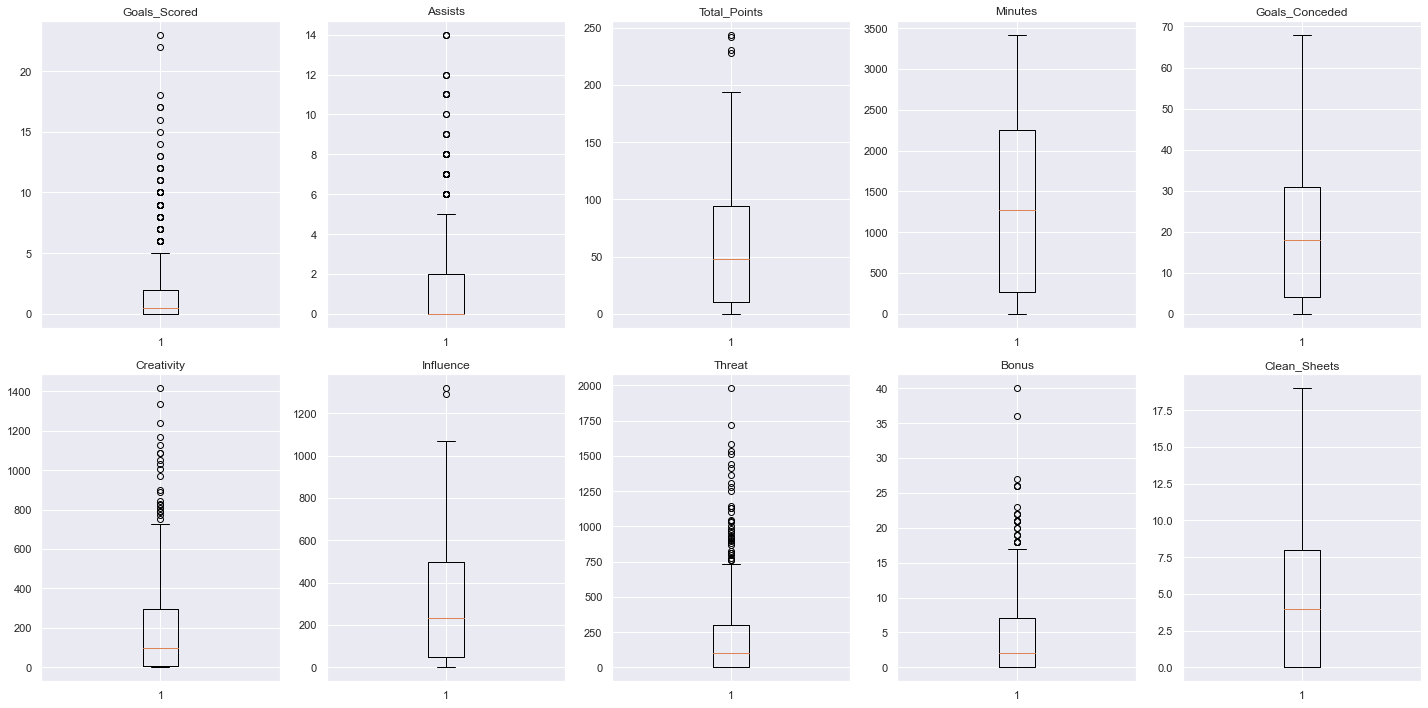

In [21]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Scaling**

- Scale the data before we proceed with clustering.

In [22]:
# Scaling the data before clustering
scaler = StandardScaler() # Initialize the Standard Scaler

subset = df.iloc[:, 3:].copy()  # Data with numerical features

subset_scaled = scaler.fit_transform(subset) # Fit_transform the scaler function on data subset

In [23]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**
PCA is a dimentionality reduction function that makes clustering easier

In [24]:
# Defining the number of principal components to generate
n = subset.shape[1]                                    # Storing the number of variables in the subset data
# returns 10 as that is the number of numerical features

pca = PCA(n_components = n, random_state = 1)          # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df))              # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

## **K-Means Clustering**

In [25]:
# copy of the pca data frame for k-means
k_means_df = data_pca.copy()

Number of Clusters: 1 	Average Distortion: 2.7730371100978024
Number of Clusters: 2 	Average Distortion: 1.8635736785898263
Number of Clusters: 3 	Average Distortion: 1.5612774038101598
Number of Clusters: 4 	Average Distortion: 1.3542782238901414
Number of Clusters: 5 	Average Distortion: 1.2931541699741687
Number of Clusters: 6 	Average Distortion: 1.2258495435854948
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.109804758457438
Number of Clusters: 9 	Average Distortion: 1.0797310475776052
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 1.0208747020267823
Number of Clusters: 12 	Average Distortion: 0.985073440903088
Number of Clusters: 13 	Average Distortion: 0.9602766985773116
Number of Clusters: 14 	Average Distortion: 0.9413187781558083


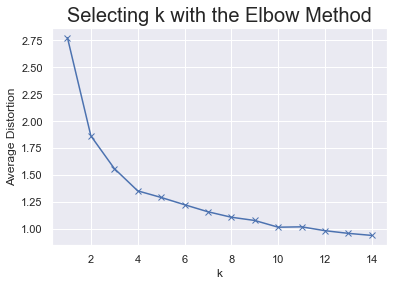

In [26]:
# determin k value

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1)
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations and Insights:**

- We will move ahead with k = 4 as this is when the graph starts to move nearly parallel to the X-axis. 

In [27]:
# Create K-Means with nclusters = 4
kmeans = KMeans(n_clusters = 4, random_state = 1) 

kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [28]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [29]:
# groupby the cluster labels
km_cluster_profile = df1.groupby("KM_segments").mean()  

In [30]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Total_Points"].count().values) 

In [31]:
# Highlight the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.460938,1.601562,55.648438,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
1,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
2,9.147541,6.639344,141.557377,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
3,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [32]:
# print the players in each cluster.

for cl in df1["KM_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [33]:
# Count number of players in each cluster 
df1.groupby(["KM_segments"])['Player_Name'].count()

KM_segments
0    128
1     99
2     61
3    188
Name: Player_Name, dtype: int64

In [34]:
# Count number of players in each position for each cluster
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    62
1            Defender      50
             Goalkeeper    17
             Midfielder    32
2            Defender       5
             Forward       20
             Midfielder    36
3            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

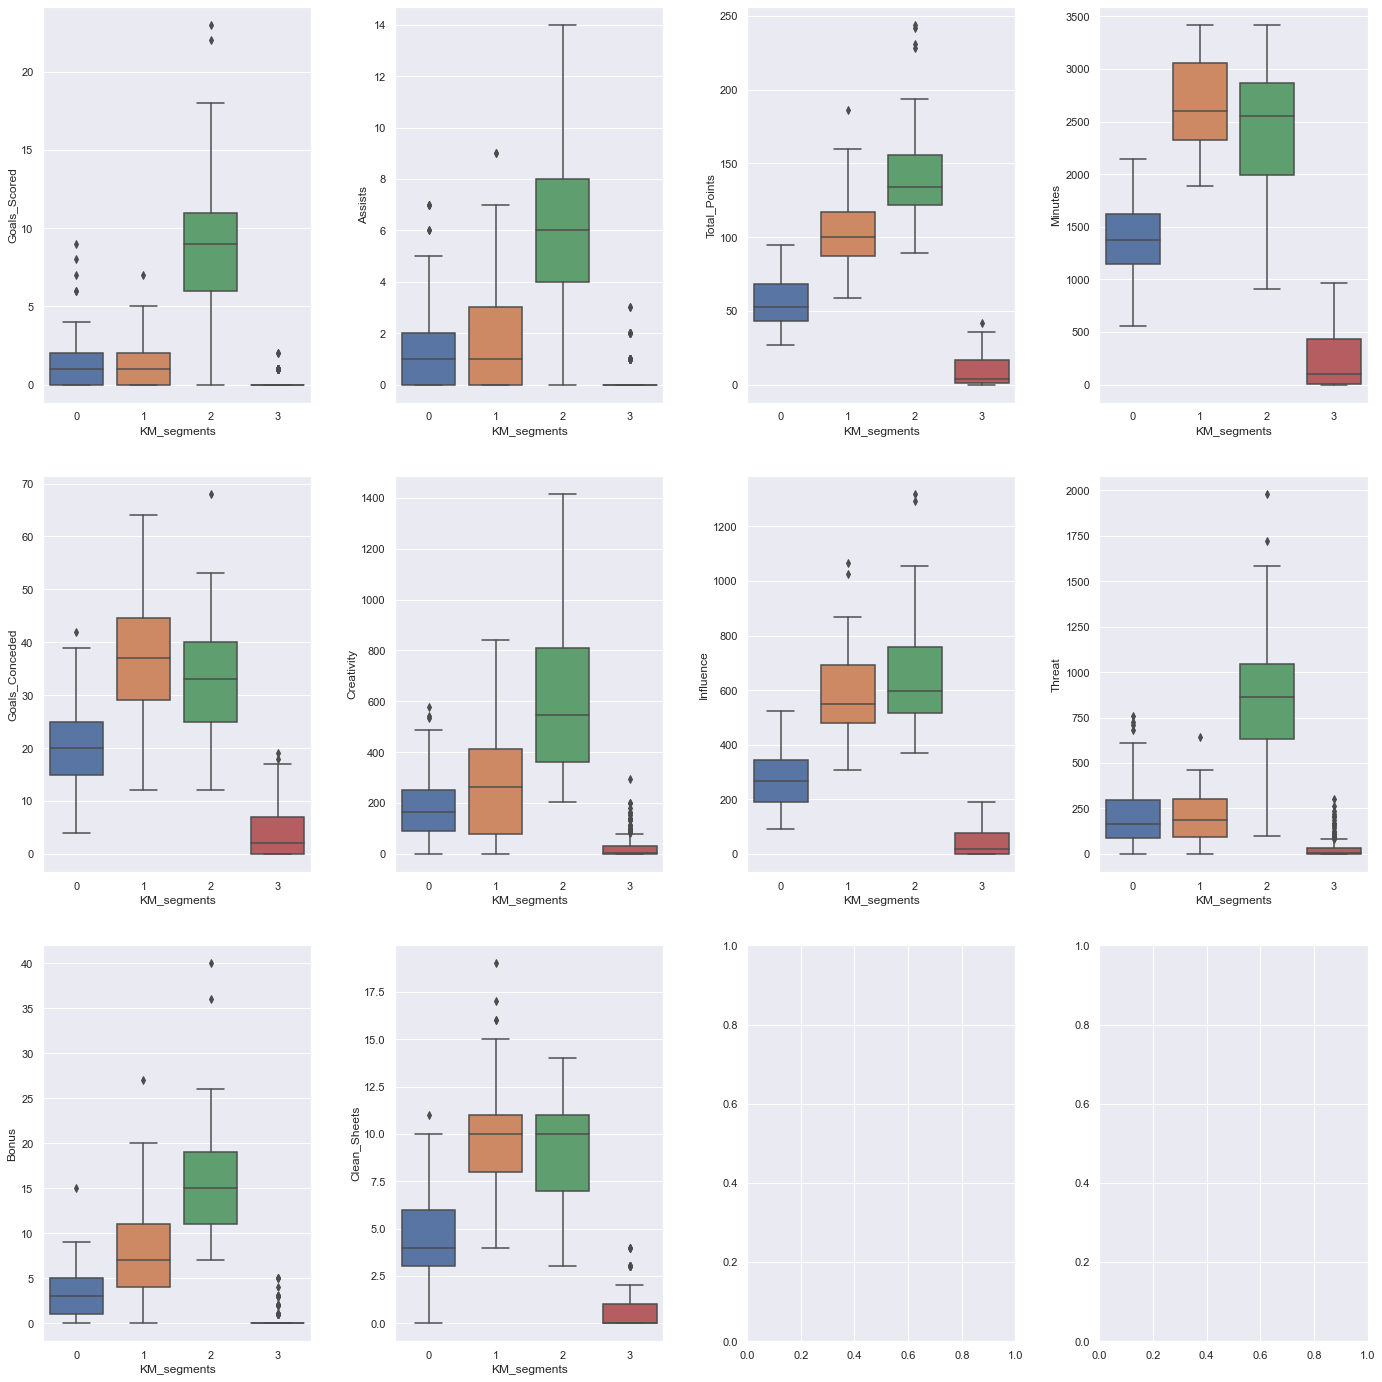

In [35]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**
**Cluster 0**
* There are 128 players in this cluster.
* Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are low.
* Most of the players in this cluster had a moderate game time, a low creativity score, a low influence score, and a moderate threat score.
* Most of the players in this cluster received low bonus points.

**Cluster 1**
* There are 99 players in this cluster.
* Most of the players in this cluster have a few goals and assists, and the total fantasy points scored in the previous season are moderate.
* Most of the players in this cluster had a high game time, a moderate creativity score, a high influence score, and a moderate threat score.
* Most of the players in this cluster received moderate bonus points.

**Cluster 2**
* There are 61 players in this cluster.
* Most of the players in this cluster have a lots of goals and assists, and the total fantasy points scored in the previous season are high.
* Most of the players in this cluster had a high game time, a high creativity, influence, and scores.
* Most of the players in this cluster received high bonus points.

**Cluster 3**
* There are 188 players in this cluster.
* Players in this cluster, except a few, have no goals and assists, and did not score any fantasy points scored in the previous season.
* Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
* Players in this cluster, except a few, received no bonus points.

**From this we can say that:**
* **Cluster 2** are the **high value players** who have performed exeptionally well last season.
* **Cluster 1** are the **moderate value players** who have performed well last season.
* **Cluster 0** are the **low value players** who have performed poorly last season despite getting game time last season*.
* **Cluster 3** from the 0-low values and game time we can assume these are the **bench players** that dont get much game time through the season. 

## **K-Medoids Clustering**

Centers the clusters around a data point rather than a mean, is more computationally expensive but can provide better results

In [36]:
kmed_df = data_pca.copy()

In [37]:
kmed = KMedoids(n_clusters = 4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [38]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] =  kmed.labels_

### **Cluster Profiling**

In [39]:
# Take the cluster-wise mean of all the variables. 
kmed_cluster_profile = df2.groupby("KMed_segments").mean()

In [40]:
# Create the "count_in_each_segment" column in K-Medoids cluster profile
kmed_cluster_profile["count_in_each_segment"] = (
    df2.groupby("KMed_segments")["Total_Points"].count().values
)


In [41]:
# Highlight the maximum average value among all the clusters for each of the variables

kmed_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


In [42]:
# Complete the code to print the players in each cluster. Hint: Use the KMed_segments feature
for cl in df2["KMed_segments"].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df2[df2["KMed_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury'
 'Jacob Ramsey' 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valentino Livramento'
 'Willy Caballero' 'Connor Wickham' 'Jack Butland' 'James McCarthy'
 'James Tomkins' 'Jean-Philippe Mateta' 

In [43]:
# Count number of players in each position for each cluster
df2.groupby(["KMed_segments", "Position"])['Player_Name'].count()

KMed_segments  Position  
0              Defender      12
               Forward       21
               Midfielder    49
1              Defender      49
               Goalkeeper    17
               Midfielder    21
2              Defender      50
               Forward       16
               Goalkeeper     3
               Midfielder    67
3              Defender      61
               Forward       27
               Goalkeeper    25
               Midfielder    58
Name: Player_Name, dtype: int64

In [44]:
# Count number of players in each cluster 
df2.groupby(["KMed_segments"])['Player_Name'].count()

KMed_segments
0     82
1     87
2    136
3    171
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

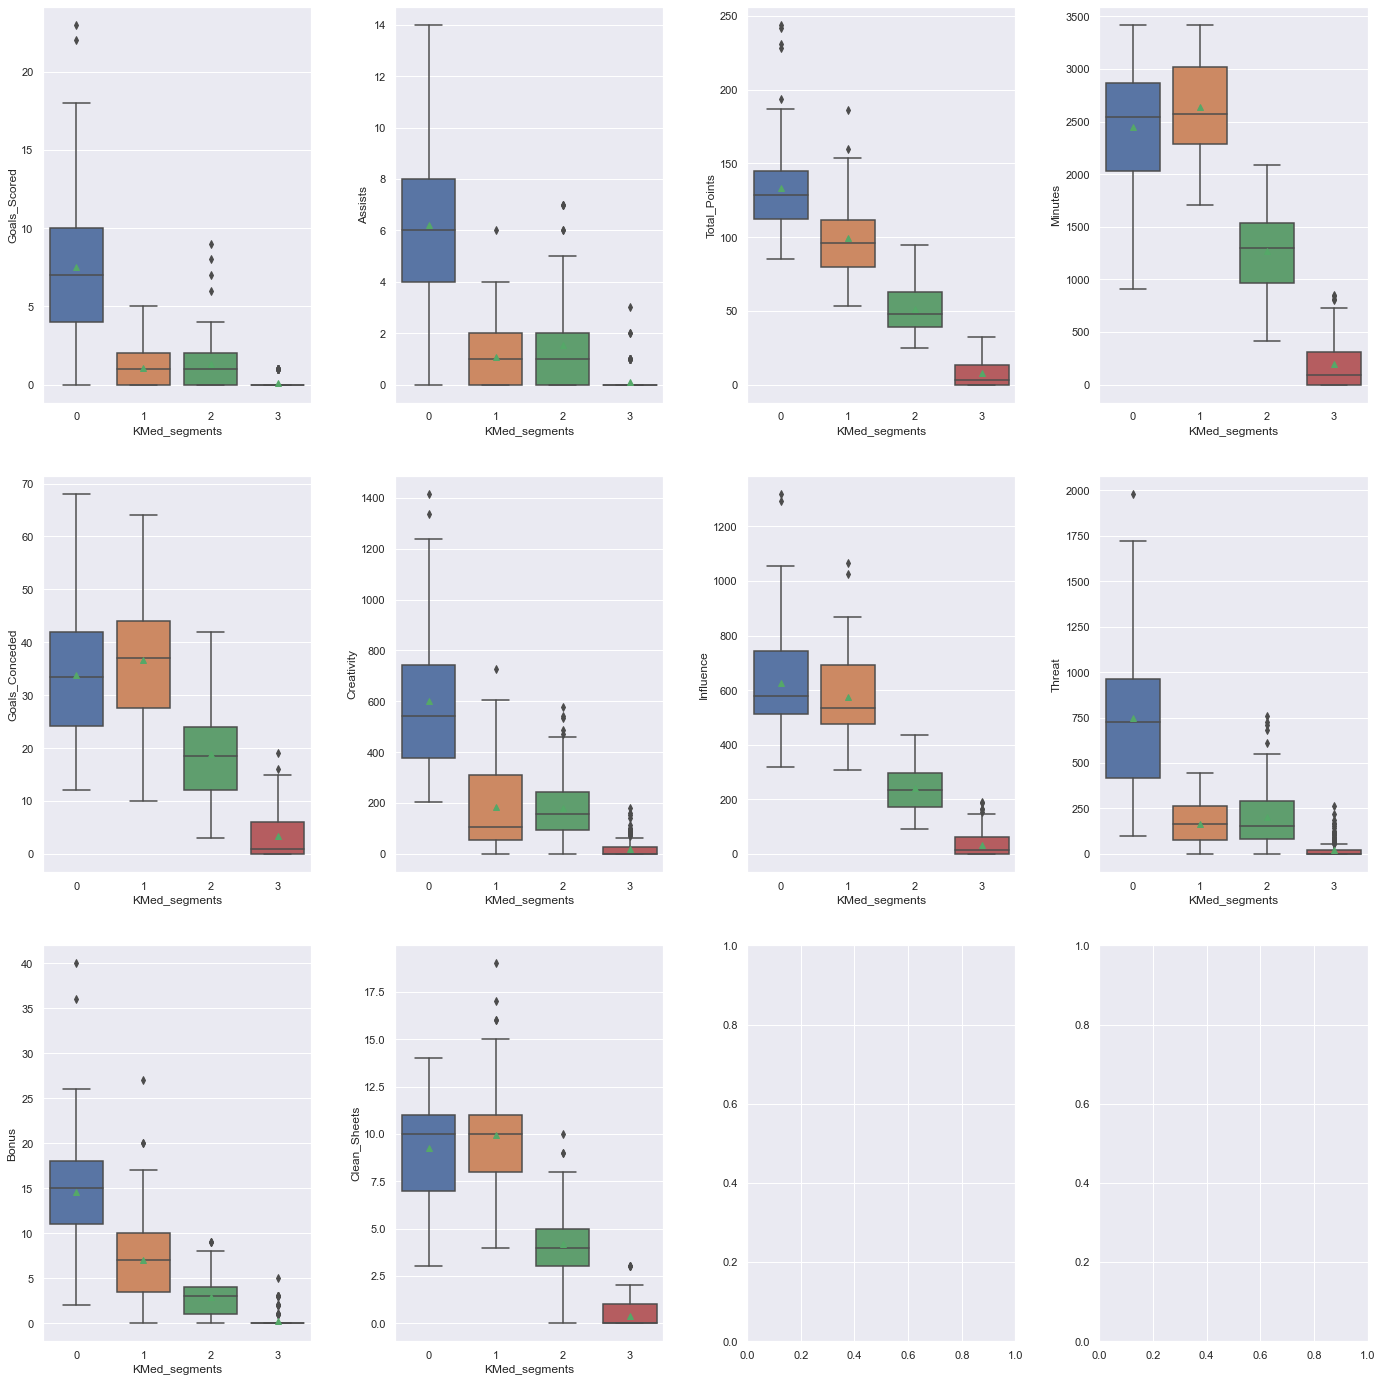

In [45]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2,
                y = df2.columns[3 + counter],
                x = "KMed_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from K-Means and K-Medoids:**
* There is a difference in the distribtuion of each cluster in both the algorithms. The cluster groups in K-Medoids are more evenly distributed since it uses median which is less likely get affected by the external data/outliers.
* The cluster profiles are same for both the algorithms, the number of players in each cluster is changing however the cluster profiles remains the same.

##  **Hierarchical Clustering**

More computationally expensive, but pottentially improves on K-means in a few ways:
* Rather than centering around a mean of a pre set number of clusters, hierarchical clustering builds a hierarchy of clusters. 
* Cannot get stuck on local minimi

In [46]:
hc_df = data_pca.copy()

In [47]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228706.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261761.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585415.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067481.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111797.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.802839439063213.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302255.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639637.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132247.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434059.
Cophenetic cor

**Explore different linkage methods with Euclidean distance only.**

In [48]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228706.
Cophenetic correlation for complete linkage is 0.7412041292261761.
Cophenetic correlation for average linkage is 0.8476499945585415.
Cophenetic correlation for centroid linkage is 0.8068296032280465.
Cophenetic correlation for ward linkage is 0.577773844586155.
Cophenetic correlation for weighted linkage is 0.8624581351067481.
****************************************************************************************************
Highest cophenetic correlation is 0.8624581351067481, which is obtained with weighted linkage.


**Dendrograms for the different linkage methods with Euclidean distance only.**

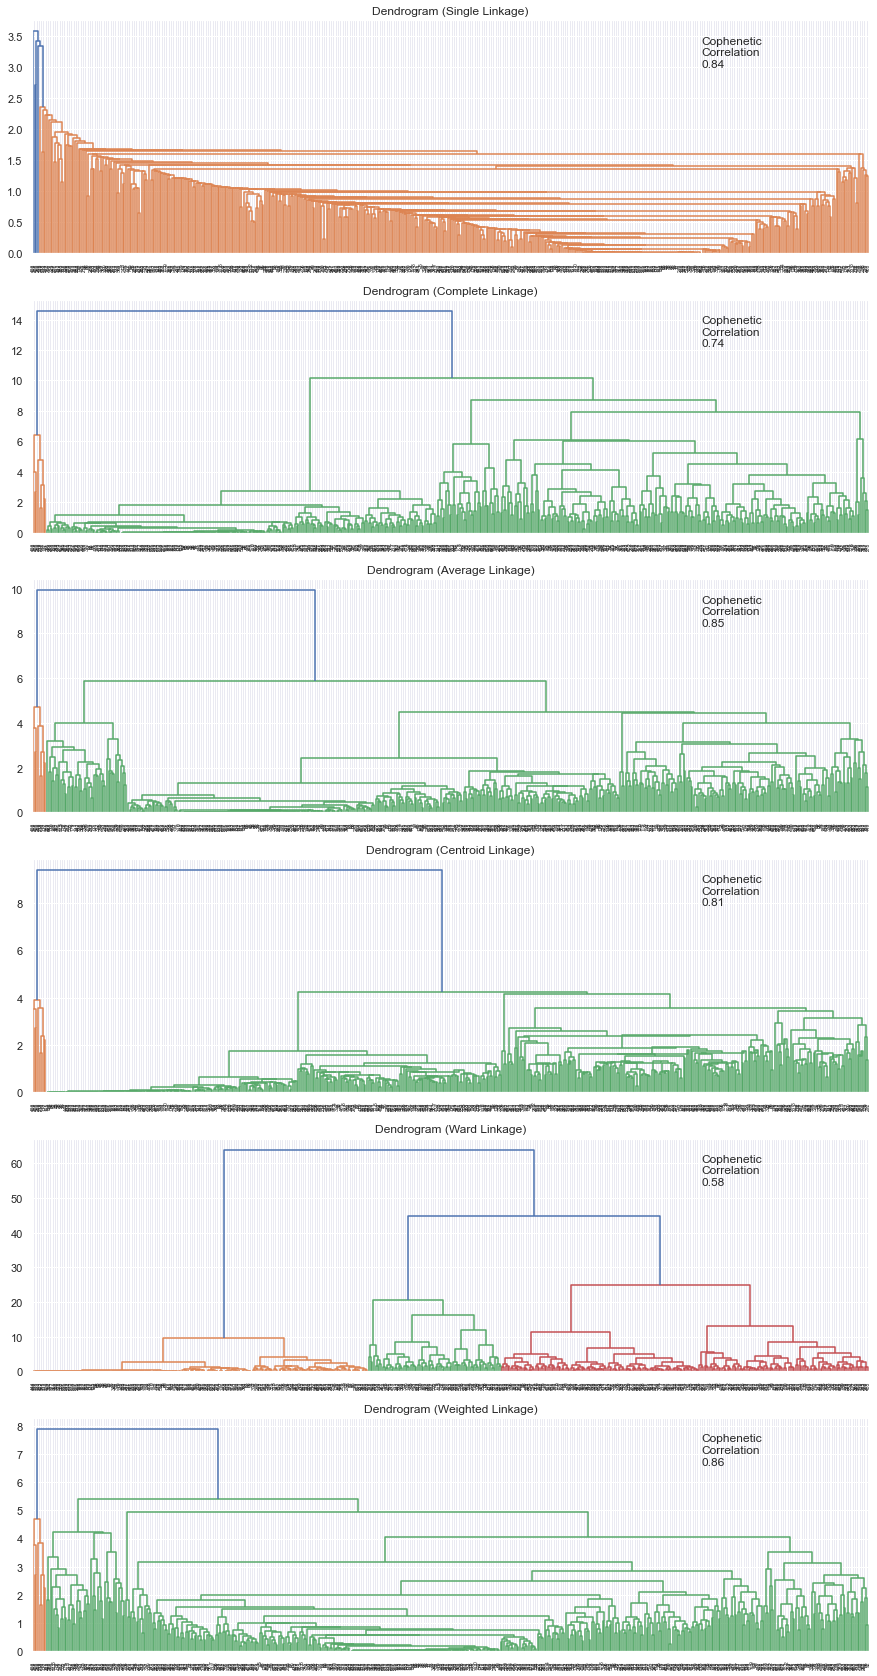

In [49]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [50]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


Use 4 clusters, euclidean distance, and average linkage (sklearn does not support weighted linkage so average is the next best option)

In [51]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' , linkage = 'average' )
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [52]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling (average linkage)**

In [53]:
# Take the cluster-wise mean of all the variables.
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [54]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [55]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [56]:
# Print the players in each cluster.
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Will try Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [57]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' , linkage = 'ward' )  # Complete the code to define the hierarchical clustering with Ward Linkage
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [58]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling (ward linkage)**

In [59]:
# Take the cluster-wise mean of all the variables. 
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [60]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Total_Points"].count().values
)

In [61]:
# Highlight the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
HC_segments,,,,,,,,,,,
0,9.925926,6.537037,140.944444,2360.370370,31.481481,566.411111,646.914815,953.370370,15.851852,9.148148,54
1,1.482456,1.640351,54.315789,1364.087719,20.789474,185.628947,262.635088,224.508772,3.070175,4.429825,114
2,1.478632,2.102564,103.239316,2614.273504,36.470085,304.364103,570.646154,206.205128,8.136752,9.811966,117
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [62]:
# Print the players in each cluster. Hint: Use the HC_segments feature
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 3, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'Edward Nketiah'
 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez' 'Pablo Mari' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Tariq Lamptey' 'Anthony Driscoll-Glennon'
 'Bailey Peacock-Farrell' 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo'
 'Josh Benson' 'Kevin Long' 'Lewis Richardson' 'Phil Bardsley'
 'Will Norris' 'Billy Gilmour' 'Emerson Palmieri dos Santos'
 'Faustino Anjorin' 'Fikayo Tomori' 'Karlo Ziger' 'Kepa Arriza

In [63]:
# check the postions of players in each group
df3.groupby(["HC_segments", "Position"])['Player_Name'].count()

HC_segments  Position  
0            Defender       1
             Forward       21
             Midfielder    32
1            Defender      38
             Forward       14
             Goalkeeper     3
             Midfielder    59
2            Defender      61
             Goalkeeper    17
             Midfielder    39
3            Defender      72
             Forward       29
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

* Cluster 0 has no goalkeepers and few defenders, this means the cluster is largely based on those with offesive positions. 
* Cluster 2 has no forwards and is likely the oposite to cluster 0, containing those with largely defensive positions. 

In [64]:
# Count number of players in each cluster 
df3.groupby(["HC_segments"])['Player_Name'].count()

HC_segments
0     54
1    114
2    117
3    191
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

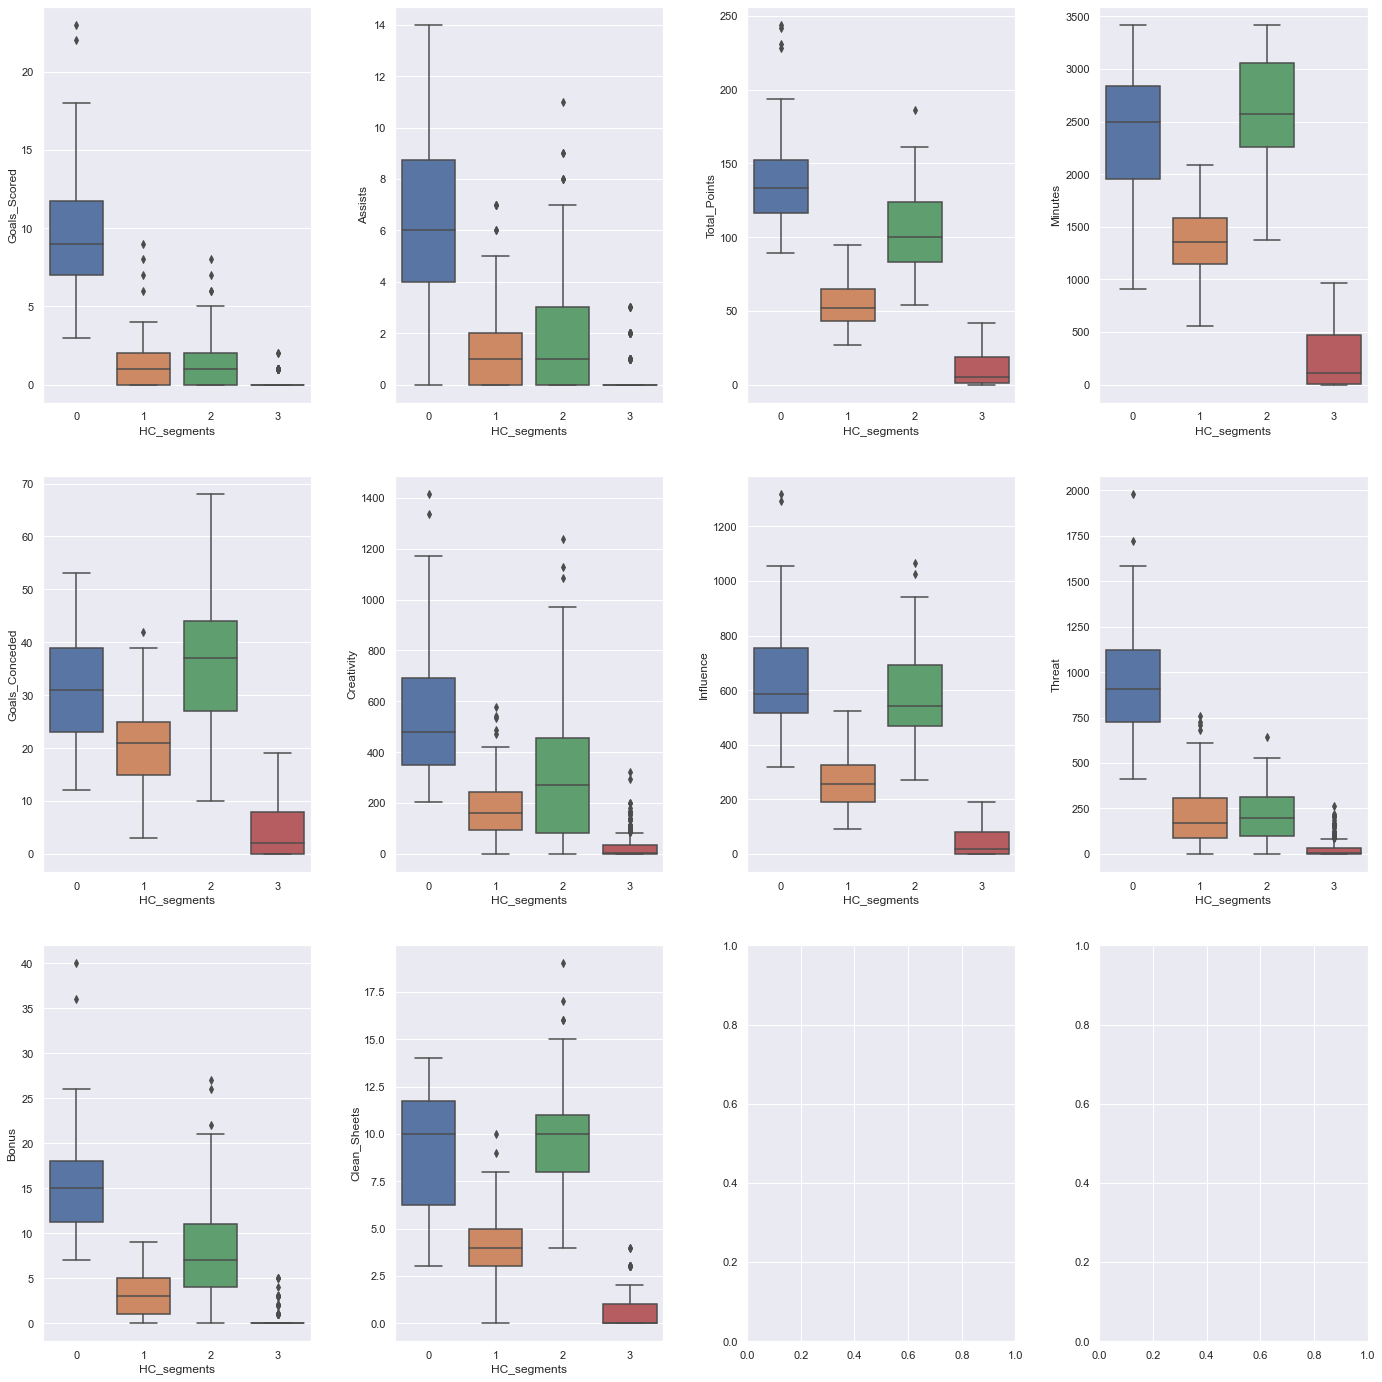

In [65]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from Hierarchical and previous algorithms:**
* The number of players in each cluster has changed, but the cluster profiles are largely the same.
* A slight change is it seems to be valueing offensive players slightly higher. 

## **GMM clustering**

In [66]:
gmm_df = data_pca.copy()

In [67]:
gmm = GaussianMixture(n_components = 4 , random_state = 1) # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df) # Fit the Gaussian Mixture algorithm on the gmm_df

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [68]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [69]:
# Take the cluster-wise mean of all the variables.
gmm_cluster_profile = df4.groupby("GMM_segments").mean()


In [70]:
# Create the "count_in_each_segment" column in gmm cluster profile
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)

In [71]:
# Highlight the maximum average value among all the clusters for each of the variables
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [72]:
# Print the players in each cluster. Hint: Use the GMM_segments feature
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

In [73]:
# check the postions of players in each group
df4.groupby(["GMM_segments", "Position"])['Player_Name'].count()

GMM_segments  Position  
0             Defender      64
              Goalkeeper    18
              Midfielder    34
1             Defender      48
              Forward       21
              Goalkeeper    19
              Midfielder    38
2             Defender      10
              Forward       32
              Midfielder    63
3             Defender      50
              Forward       11
              Goalkeeper     8
              Midfielder    60
Name: Player_Name, dtype: int64

* Cluster 0 has no forwards and is likely the oposite to cluster 1, containing those with largely defensive positions. 
the other clusters are more balanced

In [74]:
# Count number of players in each cluster 
df4.groupby(["GMM_segments"])['Player_Name'].count()

GMM_segments
0    116
1    126
2    105
3    129
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

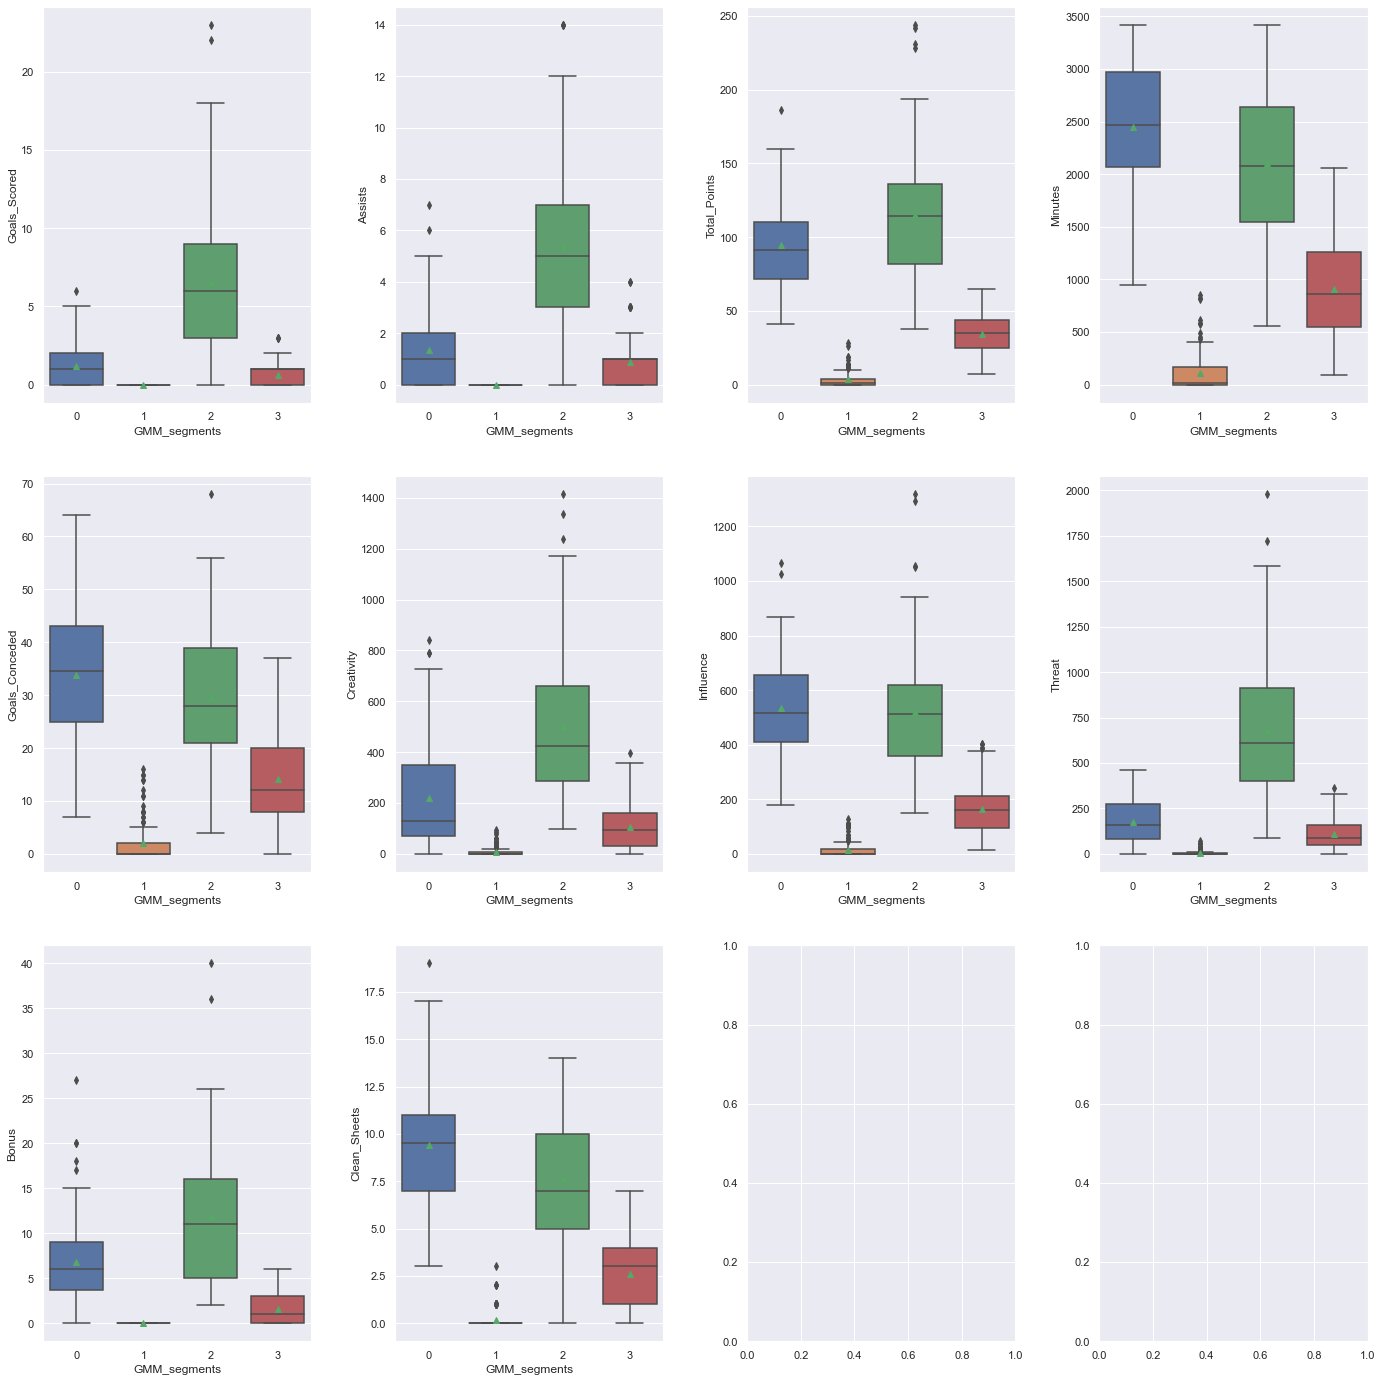

In [75]:
# Create boxplot for each of the variables
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Comparison of cluster profiles from GMM and previous algorithms:**
* As with each algorithm prior GMM provides a different distribution of players in each cluster. 
* However once again the cluster profile remains the same
* **It is likely that through all these algorithms the core cluster remains the same while the egde cases are shifting slightly.**

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, we have no control over it, unlike a supervised learning algorithm, which allows us to test our algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [76]:
dbscan_df = data_pca.copy()

In [77]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [78]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5283008912823889
For eps value =2 For min sample =20 The average silhoutte_score is : 0.36478187516967553
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [79]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [80]:
# Applying DBSCAN with the hyperparmeter values that we got
dbs = DBSCAN(eps = 3, min_samples = 20)

In [81]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df["db_segments"] = dbs.fit_predict(dbscan_df)

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

### **Cluster Profiling**

In [82]:
# Take the cluster-wise mean of all the variables.
db_cluster_profile = df5.groupby("db_segments").mean()

In [83]:
# Create the "count_in_each_segment" column in hierarchical cluster profile
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [84]:
# Highlight the maximum average value among all the clusters for each of the variables
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)


,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,470


* DBSCAN was able to give only two clusters with eps = 3 and min_sample = 20 which is very skewed.
* **It is not able perform well on this dataset.**

## **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [85]:
# Initializing K-Means with number of clusters as 4 and random_state = 1
kmeans = KMeans(n_clusters = 4, random_state = 1)  

# Fitting and predicting K-Means on data_pca
preds = kmeans.fit_predict((data_pca)) 

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)                

print(score)         

0.40413213643851853


In [86]:
# Initialize K-Medoids with number of clusters as 4 and random_state = 1
kmedoids = KMedoids(n_clusters = 4, random_state = 1)

# Fitting and predicting K-Medoids on data_pca
preds = kmedoids.fit_predict((data_pca))

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.393822499693573


In [87]:
# Initialize Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward",) 

# Fitting and predicting HC algorithm on data_pca  
preds = HCmodel.fit_predict(data_pca)  

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.3849709986025467


In [88]:
# Initialize Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)   

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds = gmm.fit_predict((data_pca))

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the score 
print(score)

0.2849464429730214


### **Results**

**Based on the silhouette score, we can see that K-Means algorithm is giving the best score on the data.**

## **Conclusion:**
* The players who have a greater influence on the outcome of the game typically play for a longer duration every game and score more fantasy points.
    * This is also likely arising from a primary analysis. Each team does analysis of their players and gives better players more game time. More game time also allows those players to score more fantasy points but is also a reflection of that initial analysis that they are better players. 
* The players can be sold for more money who have higher goals scored, creativity, and influence.
* Since there is a drop at K = 4 in the elbow plot, we selected K as 4 for clustering.
    * This indicates that there the clusters could possibly be seperated into 5 groups if needed. Howerver, from our analysis 4 groups seems to represent a distinct spread of players. 
* We implemented five algorithms, but we have chosen K-Means algorithm as the final algorithm because it has the highest silhouette score of 0.40.
    * K-medios also provides a high scoring silhouette score and could also be used if that is a more preferenciable ratio of players. 

## **Recommendations:**
* Cluster 0 players are the top players for fantasy. They fetch more points and have a higher chance of getting bonus points too. These players should be priced higher than the others so that it will be difficult to accommodate too many of them in the same team (because of the fixed budget) and fantasy managers have to make wise choices.
* Cluster 1 players are players who do not play many minutes, most likely come on as substitutes and fetch lesser fantasy points as a result. These players should be priced low and can be good differential picks.
* Cluster 2 are the players who are influential in their team's play but do not tend to score or assist much, resulting in lesser fantasy points than the Cluster 0 players. These players should be priced somewhere between the Cluster 0 and Cluster 1 players.
* Cluster 3 has the players who are in the squad to provide backup in case any of the starting 11 players get injured. They get lower game time and barely get any fantasy points. These players should be priced the lowest amongst the 4 clusters.
* Player performances from previous seasons should be taken into account and fantasy prices from the previous season should be referred to as a benchmark to determine the price for the upcoming season.
* OnSports should conduct cluster analysis separately for each of the playing positions to arrive at a better fantasy pricing strategy, given that football is heavily biased towards offensive players.